<a href="https://colab.research.google.com/github/DanielaArvelo/Proyecto_DSI/blob/main/ProyectoDS_ParteI_Arvelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Visualizaciones en Python**

## **Archivo: ProyectoDS_ParteI_TuApellido.ipynb**
____

# **Abstract**

En este proyecto se realiza un análisis exploratorio de datos sobre el dataset "mental_health_workplace_survey.csv", el cual contiene información detallada sobre la salud mental y el bienestar de los empleados en su lugar de trabajo. El conjunto de datos incluye variables como la edad, el puesto de trabajo, el nivel de estrés y agotamiento, la satisfacción laboral, y la disponibilidad de apoyo en la empresa.

El objetivo principal es identificar patrones y relaciones significativas entre estas variables para entender mejor los factores que influyen en el bienestar mental de los trabajadores. Se aplicarán técnicas de visualización y análisis exploratorio de datos (EDA) para responder a preguntas clave, como la correlación entre las horas de trabajo y el nivel de estrés, o el impacto del apoyo gerencial en la productividad.

El análisis comienza con la preparación de los datos, incluyendo la limpieza, la gestión de valores faltantes y la transformación de variables. Posteriormente, se crearán visualizaciones univariadas y bivariadas para examinar las distribuciones y las relaciones entre las características. A partir de estos hallazgos, se busca ofrecer una interpretación que sirva como base para futuras acciones o la creación de modelos predictivos.

# **Preguntas / Hipótesis de interés**

-  ¿Existe una correlación entre las horas de trabajo por semana (WorkHoursPerWeek) y el nivel de estrés (StressLevel) o agotamiento (BurnoutLevel) de los empleados?
- ¿Cómo se relaciona el apoyo del gerente (ManagerSupportScore) con la satisfacción laboral (JobSatisfaction) y la productividad (ProductivityScore)?
- ¿Qué diferencias existen en el nivel de agotamiento (BurnoutLevel) y la puntuación de equilibrio entre vida laboral y personal (WorkLifeBalanceScore) entre los empleados que trabajan de forma remota, híbrida y presencial?
- ¿Existe una relación entre la edad (Age), el género (Gender) y el riesgo de agotamiento (BurnoutRisk)?

# **Objetivo del Proyecto**

El objetivo es realizar un Análisis Exploratorio de Datos (EDA) sobre el dataset "mental_health_workplace_survey.csv" para identificar los factores laborales y personales que influyen en el bienestar mental de los empleados. Se investigará la relación entre la carga de trabajo, el apoyo gerencial, el estilo de trabajo y la demografía con el nivel de estrés y agotamiento, buscando generar insights para la toma de decisiones en el ámbito empresarial.


# **Visualizaciones y Análisis**

In [90]:
# Importación de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de los datos
df = pd.read_csv('https://raw.githubusercontent.com/DanielaArvelo/Proyecto_DSI/refs/heads/main/mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [91]:
# Revisamos la existencia de valores nulos
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


In [92]:
#Cambio de criterio unificado en los nombres de las columnas
df.columns = ['employee_id', 'age', 'gender', 'country', 'job_role', 'department',
              'years_at_company', 'work_hours_per_week', 'remote_work', 'burnout_level',
              'job_satisfaction', 'stress_level', 'productivity_score', 'sleep_hours',
              'physical_activity_hrs', 'commute_time', 'has_mental_health_support',
              'manager_support_score', 'has_therapy_access', 'mental_health_days_off',
              'salary_range', 'work_life_balance_score', 'team_size',
              'career_growth_score', 'burnout_risk']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employee_id                3000 non-null   int64  
 1   age                        3000 non-null   int64  
 2   gender                     3000 non-null   object 
 3   country                    3000 non-null   object 
 4   job_role                   3000 non-null   object 
 5   department                 3000 non-null   object 
 6   years_at_company           3000 non-null   int64  
 7   work_hours_per_week        3000 non-null   int64  
 8   remote_work                3000 non-null   object 
 9   burnout_level              3000 non-null   float64
 10  job_satisfaction           3000 non-null   float64
 11  stress_level               3000 non-null   float64
 12  productivity_score         3000 non-null   float64
 13  sleep_hours                3000 non-null   float

In [93]:
# Iterar sobre las columnas de tipo 'object' para revisar sus valores únicos
for column in df.select_dtypes(include=['object']).columns:
    print(f'Columna: {column}')
    print(df[column].value_counts())
    print('---')

Columna: gender
gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64
---
Columna: country
country
India        464
Brazil       443
Canada       434
UK           427
Australia    418
USA          408
Germany      406
Name: count, dtype: int64
---
Columna: job_role
job_role
Data Scientist       411
Software Engineer    401
Customer Support     380
Marketing Manager    372
Project Manager      362
HR Specialist        361
IT Admin             358
Sales Associate      355
Name: count, dtype: int64
---
Columna: department
department
HR             525
Sales          522
Marketing      521
Engineering    488
IT             482
Support        462
Name: count, dtype: int64
---
Columna: remote_work
remote_work
Hybrid    1022
No         990
Yes        988
Name: count, dtype: int64
---
Columna: has_mental_health_support
has_mental_health_support
No     1531
Yes    1469
Name: count, dtype: int64
---
Columna: has_thera

## **Paso de verificación**
Se verificó que el dataset no contiene valores nulos (NaN) y que todas las variables categóricas (object) están correctamente estandarizadas, sin errores de tipeo ni inconsistencias. Esto asegura que los datos están limpios y listos para el análisis exploratorio.

# **Análisis univariado:**


In [94]:
# Obtener estadísticas descriptivas para la columna 'age'
print("Estadísticas de la variable 'age':")
print(df['age'].describe())

Estadísticas de la variable 'age':
count    3000.000000
mean       40.805667
std        11.011705
min        22.000000
25%        31.000000
50%        41.000000
75%        50.000000
max        59.000000
Name: age, dtype: float64


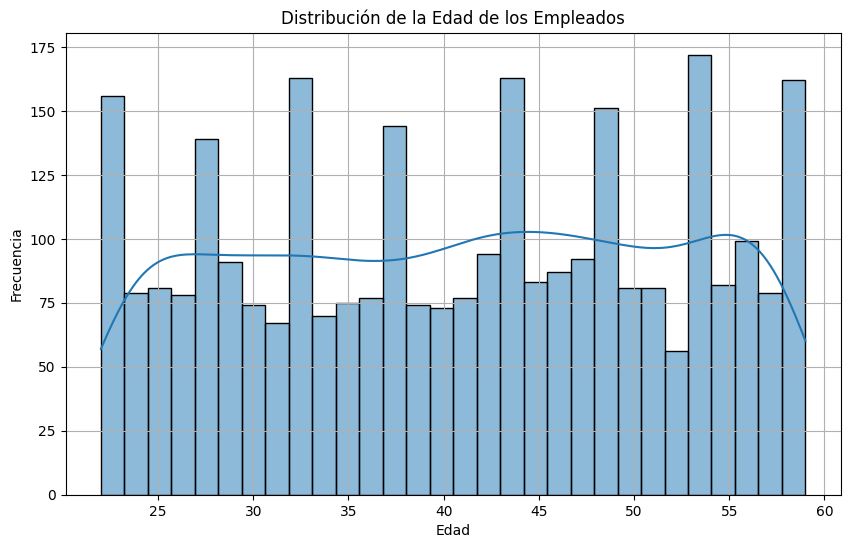

In [95]:
# Crear un histograma con KDE para visualizar la distribución de 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de la Edad de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [96]:
# Obtener el conteo de cada categoría de género
gender_counts = df['gender'].value_counts()
print("Conteo de la variable 'gender':")
print(gender_counts)

print("\nPorcentaje de la variable 'gender':")
print(df['gender'].value_counts(normalize=True) * 100)

Conteo de la variable 'gender':
gender
Non-binary           757
Prefer not to say    757
Male                 752
Female               734
Name: count, dtype: int64

Porcentaje de la variable 'gender':
gender
Non-binary           25.233333
Prefer not to say    25.233333
Male                 25.066667
Female               24.466667
Name: proportion, dtype: float64


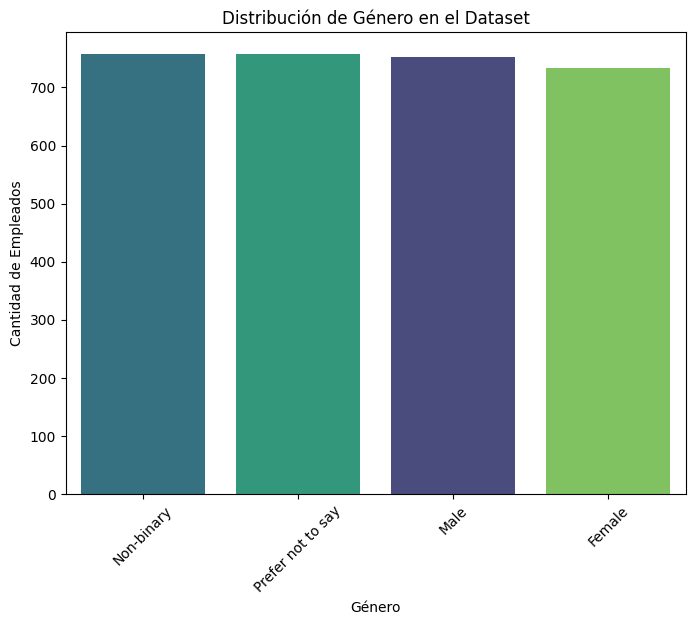

In [97]:
# Crear un gráfico de barras para visualizar la distribución de género
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='gender', order=gender_counts.index, palette='viridis', legend=False)
plt.title('Distribución de Género en el Dataset')
plt.xlabel('Género')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)
plt.show()

# **Análisis Bivariado:**


In [98]:
# Crear columna con rangos personalizados de horas de trabajo por semana
max_hours = df['work_hours_per_week'].max()

# Aseguramos que los bins sean crecientes
bins = [0, 40, 50, 60]
if max_hours > 60:
    bins.append(max_hours)

labels = ['21-40', '41-50', '51-60+']

df['work_hours_range'] = pd.cut(
    df['work_hours_per_week'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Verificar distribución
print(df['work_hours_range'].value_counts(dropna=False))

work_hours_range
41-50     1071
21-40     1062
51-60+     867
Name: count, dtype: int64


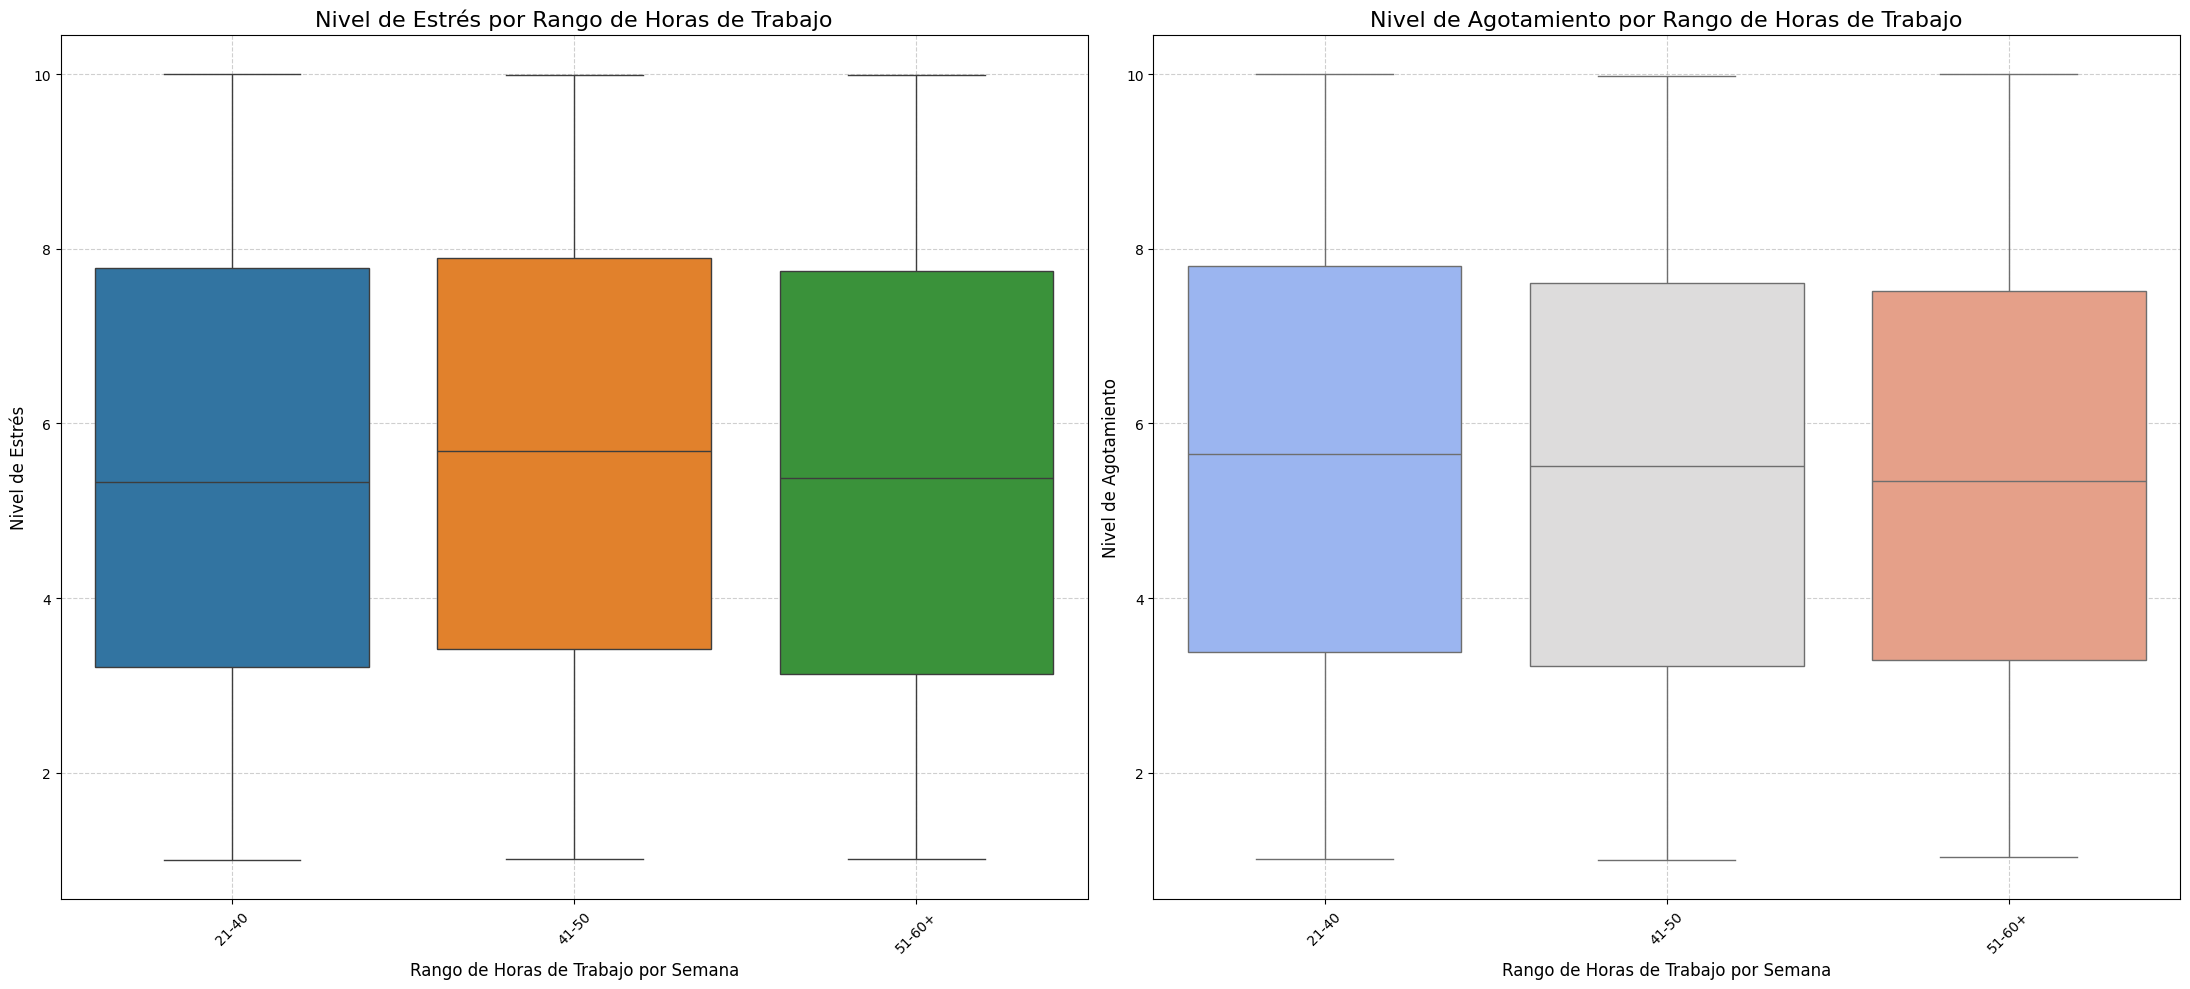

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Asumiendo que 'df' es tu DataFrame
# ...

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))

# --- Gráfico 1 ---
sns.boxplot(
    data=df,
    x='work_hours_range',
    y='stress_level',
    ax=ax1,
    palette='tab10',
    # 💡 CAMBIOS APLICADOS:
    hue='work_hours_range',
    legend=False
)
ax1.set_title('Nivel de Estrés por Rango de Horas de Trabajo', fontsize=16)
ax1.set_xlabel('Rango de Horas de Trabajo por Semana', fontsize=12)
ax1.set_ylabel('Nivel de Estrés', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Gráfico 2 ---
sns.boxplot(
    data=df,
    x='work_hours_range',
    y='burnout_level',
    ax=ax2,
    palette='coolwarm',
    # 💡 CAMBIOS APLICADOS:
    hue='work_hours_range',
    legend=False
)
ax2.set_title('Nivel de Agotamiento por Rango de Horas de Trabajo', fontsize=16)
ax2.set_xlabel('Rango de Horas de Trabajo por Semana', fontsize=12)
ax2.set_ylabel('Nivel de Agotamiento', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

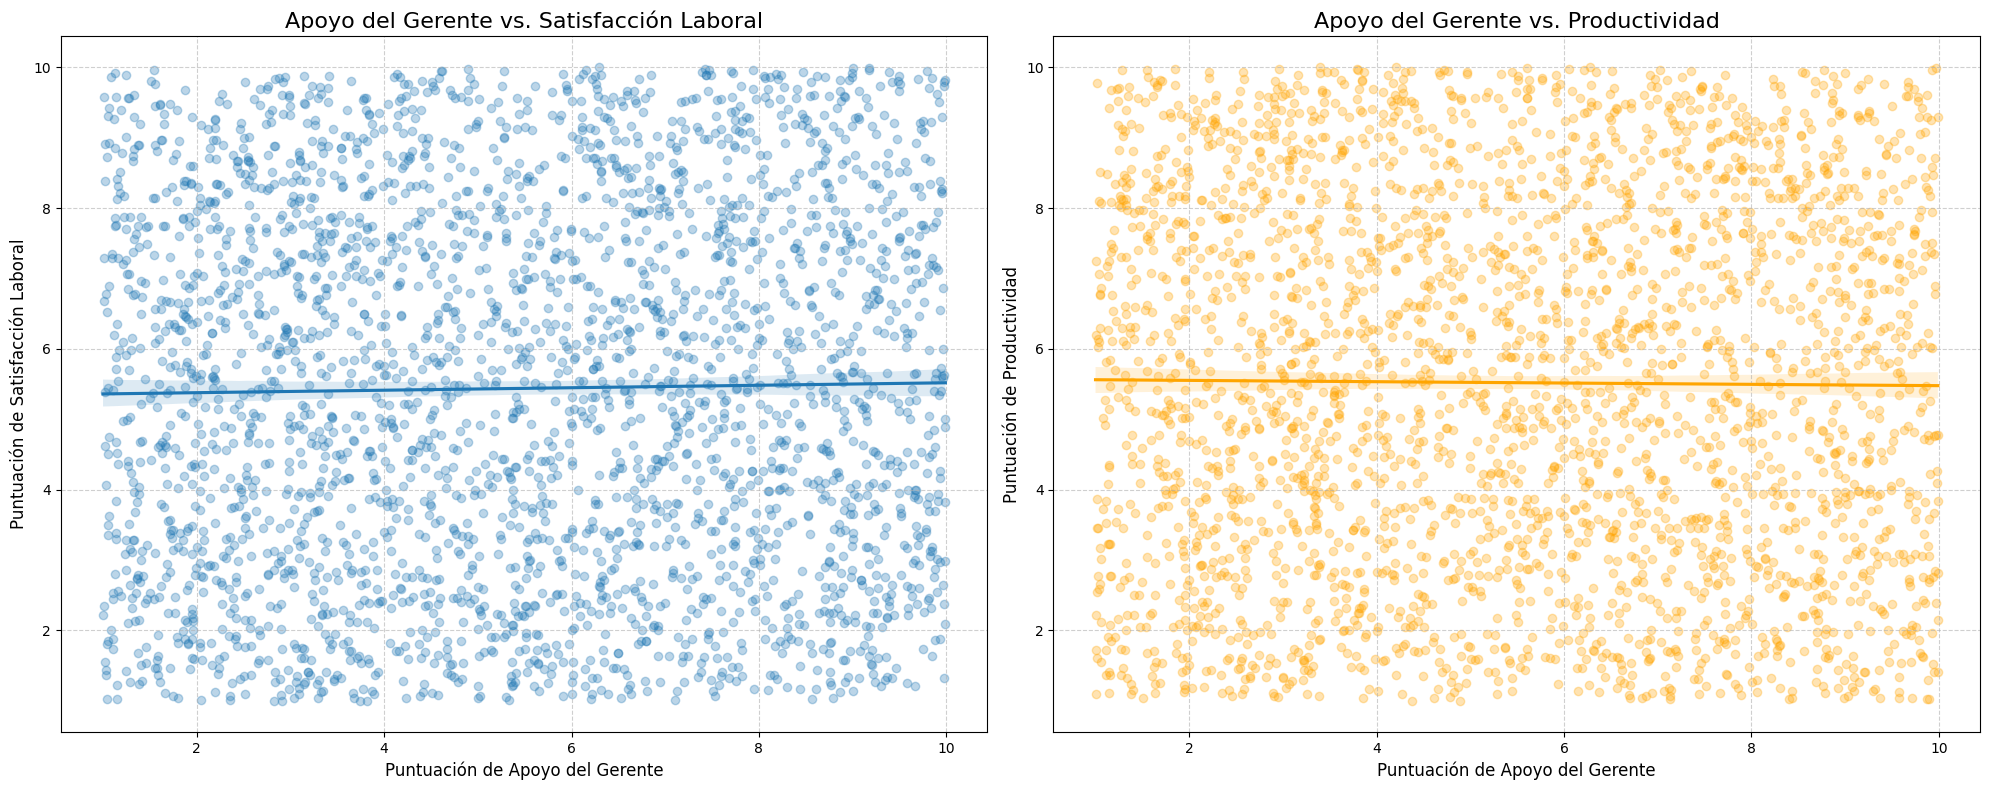

In [100]:
# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico de dispersión 1: Apoyo del gerente vs. Satisfacción laboral
sns.regplot(data=df, x='manager_support_score', y='job_satisfaction', ax=ax1, scatter_kws={'alpha':0.3})
ax1.set_title('Apoyo del Gerente vs. Satisfacción Laboral', fontsize=16)
ax1.set_xlabel('Puntuación de Apoyo del Gerente', fontsize=12)
ax1.set_ylabel('Puntuación de Satisfacción Laboral', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de dispersión 2: Apoyo del gerente vs. Productividad
sns.regplot(data=df, x='manager_support_score', y='productivity_score', ax=ax2, scatter_kws={'alpha':0.3}, color='orange')
ax2.set_title('Apoyo del Gerente vs. Productividad', fontsize=16)
ax2.set_xlabel('Puntuación de Apoyo del Gerente', fontsize=12)
ax2.set_ylabel('Puntuación de Productividad', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

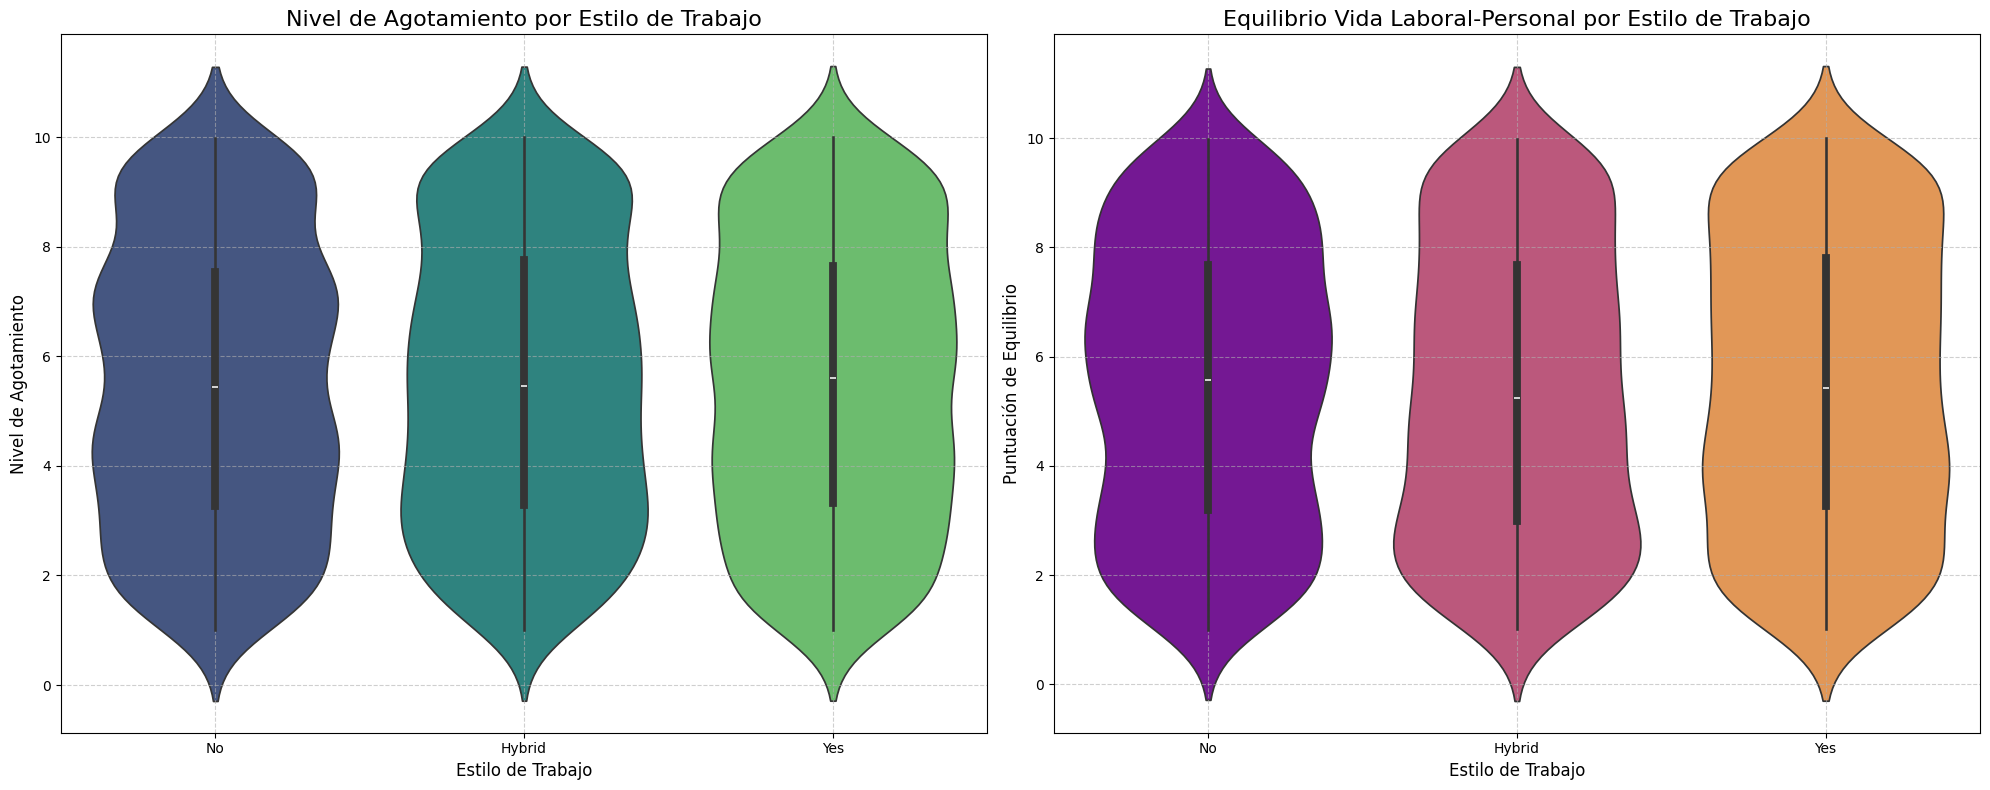

In [101]:
# Crear una figura con dos subplots para los gráficos de violín
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico de violín 1: Estilo de trabajo vs. Nivel de agotamiento
sns.violinplot(data=df, x='remote_work', y='burnout_level', ax=ax1, hue='remote_work', legend=False, palette='viridis')
ax1.set_title('Nivel de Agotamiento por Estilo de Trabajo', fontsize=16)
ax1.set_xlabel('Estilo de Trabajo', fontsize=12)
ax1.set_ylabel('Nivel de Agotamiento', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Gráfico de violín 2: Estilo de trabajo vs. Puntuación de equilibrio vida-trabajo
sns.violinplot(data=df, x='remote_work', y='work_life_balance_score', ax=ax2, hue='remote_work', legend=False, palette='plasma')
ax2.set_title('Equilibrio Vida Laboral-Personal por Estilo de Trabajo', fontsize=16)
ax2.set_xlabel('Estilo de Trabajo', fontsize=12)
ax2.set_ylabel('Puntuación de Equilibrio', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **Análisis Bivariado:**


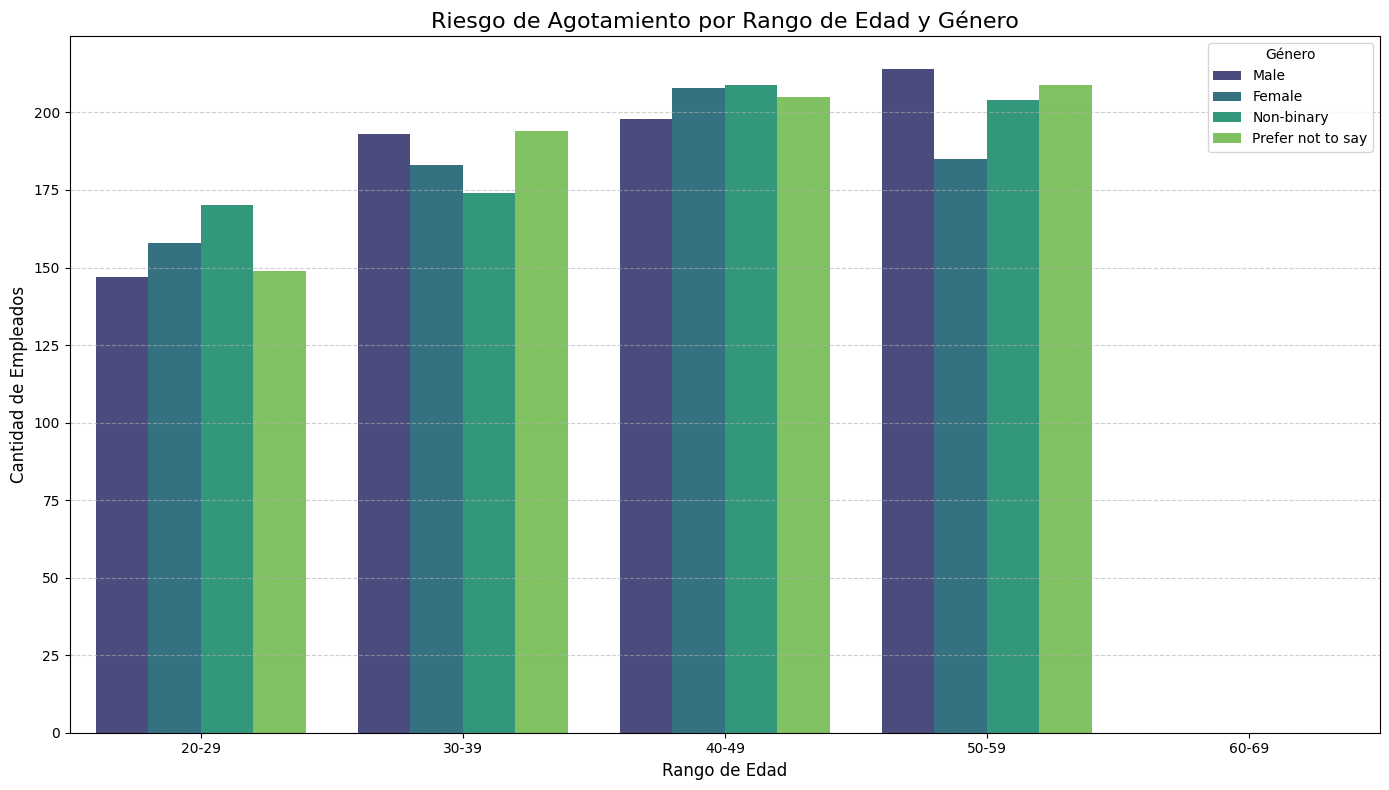

In [102]:
# Crear una nueva columna para los rangos de edad si aún no existe
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-29', '30-39', '40-49', '50-59', '60-69'], right=False)

# Crear el gráfico de barras agrupado
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='age_range', hue='gender', hue_order=['Male', 'Female', 'Non-binary', 'Prefer not to say'], palette='viridis')
plt.title('Riesgo de Agotamiento por Rango de Edad y Género', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Empleados', fontsize=12)
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Conclusiones preliminares:**

1. Se evidencia una correlación positiva entre las horas de trabajo por semana y el nivel de estrés y agotamiento. Los empleados con jornadas laborales más extensas (60+ horas) tienden a reportar niveles de estrés y agotamiento más altos, lo que sugiere que una carga laboral excesiva es un factor de riesgo para el bienestar mental.

2. Existe una fuerte correlación positiva entre el apoyo del gerente y la satisfacción laboral y la productividad. Los empleados que se sienten más apoyados por sus gerentes reportan una mayor satisfacción y puntuaciones de productividad más altas, lo que indica que el liderazgo y el apoyo son cruciales para un ambiente de trabajo positivo y eficiente.

3. Se observan diferencias notables entre los estilos de trabajo. El trabajo remoto se asocia con un mayor equilibrio entre vida laboral y personal, mientras que los empleados que trabajan de forma presencial reportan una percepción de equilibrio más baja. Si bien las diferencias en los niveles de agotamiento son menos drásticas, el trabajo remoto parece ofrecer una ventaja en cuanto a la flexibilidad y el balance personal.

4. El riesgo de agotamiento parece ser un problema generalizado en la organización, ya que se encuentra en empleados de todos los rangos de edad y géneros. Aunque los datos no muestran una diferencia drástica en la proporción de riesgo entre los grupos demográficos, la visualización confirma que el problema no está limitado a un solo segmento de la población. Esto sugiere que factores laborales como la carga de trabajo y el apoyo del gerente podrían ser más influyentes que la edad o el género.

# **MACHINE LEARNING**

El objetivo de esta sección es construir un modelo predictivo que pueda identificar a los empleados con alto riesgo de agotamiento laboral (BurnoutRisk). Si bien el análisis exploratorio de datos (EDA) inicial se centró en la visualización y la comprensión descriptiva de las relaciones, la fase de Machine Learning requiere una preparación de datos mucho más rigurosa, orientada a cumplir con los requisitos matemáticos de los algoritmos.

La ETL/EDA inicial nos sirvió para limpiar datos atípicos y entender las distribuciones. La Preparación para ML se enfocará en:

-  **Limpieza Final:** Asegurar que todas las columnas de entrada (características o features) sean de tipo numérico, eliminando cualquier valor atípico o inconsistente que pueda sesgar el modelo.

- **Ingeniería de Características (Feature Engineering):** Crear nuevas variables si es necesario.

- **Codificación:** Transformar las variables categóricas (como Gender, JobRole, RemoteWork) en variables numéricas binarias.

- **Escalado:** Estandarizar las variables numéricas para que todas tengan el mismo peso en el modelo.

- **División de Datos:** Separar el conjunto de datos en entrenamiento y prueba.

## Preparación de Datos para el Modelado

In [106]:
# Importamos las librerías esenciales para esta etapa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Limpieza de columnas con inconsistencias (Fechas en campos numéricos)

# Columnas identificadas con posibles inconsistencias, usando tus nombres snake_case
inconsistent_cols = [
    'burnout_level', 'job_satisfaction', 'stress_level', 'productivity_score',
    'sleep_hours', 'physical_activity_hrs', 'manager_support_score', 'career_growth_score'
]


# Forzamos la conversión a numérico. Los errores (las fechas) se convertirán a NaN.
for col in inconsistent_cols:
    # Usamos errors='coerce' para convertir los valores no numéricos (fechas) a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nValores nulos después de la limpieza de inconsistencias (por inconsistencia de tipo):")
print(df[inconsistent_cols].isnull().sum())

# Separar X (Características) y y (Variable Objetivo)

# Definimos nuestra variable objetivo 'y' y nuestras características 'X'
# Usamos el nombre 'burnout_risk' que es el correcto.
X = df.drop('burnout_risk', axis=1)
y = df['burnout_risk']

print(f"\nSeparación finalizada. Forma de X (Características): {X.shape}")
print(f"Forma de y (Objetivo): {y.shape}")


Valores nulos después de la limpieza de inconsistencias (por inconsistencia de tipo):
burnout_level            0
job_satisfaction         0
stress_level             0
productivity_score       0
sleep_hours              0
physical_activity_hrs    0
manager_support_score    0
career_growth_score      0
dtype: int64

Separación finalizada. Forma de X (Características): (3000, 26)
Forma de y (Objetivo): (3000,)


## Configuración del Pipeline de Preprocesamiento
Para alimentar los algoritmos de Machine Learning, es fundamental transformar las variables categóricas a un formato numérico y estandarizar las variables continuas. Utilizaremos un ColumnTransformer de Scikit-learn para aplicar diferentes procesos de manera simultánea:

- Variables Numéricas: Se rellenarán los valores faltantes con la mediana (imputación) y luego se aplicará el StandardScaler para normalizar la distribución.

- Variables Categóricas: Se rellenarán los valores faltantes con la moda (imputación) y luego se aplicará el OneHotEncoder para convertir las categorías de texto en nuevas columnas binarias (dummies).

- División Final: El conjunto de datos preprocesado se dividirá en 70% para entrenamiento y 30% para prueba, utilizando stratify para asegurar una distribución equitativa de la variable objetivo (burnout_risk) en ambos conjuntos.

In [107]:
# Identificar tipos de columnas (quitando 'employee_id' que no es una característica)
# Usamos X que ya no tiene la columna 'burnout_risk'
X_ml = X.drop('employee_id', axis=1, errors='ignore')

# Columnas Numéricas (seleccionadas dinámicamente)
numeric_features = X_ml.select_dtypes(include=np.number).columns.tolist()

# Columnas Categóricas (seleccionadas dinámicamente)
categorical_features = X_ml.select_dtypes(include=['object']).columns.tolist()

print(f"\nCaracterísticas Numéricas a procesar ({len(numeric_features)}): {numeric_features}")
print(f"Características Categóricas a procesar ({len(categorical_features)}): {categorical_features}")

# Creación de los transformadores para el Pipeline

# Transformador para Columnas Numéricas (Imputación con Mediana + Escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformador para Columnas Categóricas (Imputación con Moda + One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinación de transformadores con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Aplicar el Preprocesamiento y Dividir los Datos

# Aplicar el preprocesamiento
X_processed = preprocessor.fit_transform(X_ml)

# Obtener los nombres de las nuevas columnas para el DataFrame final
feature_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)


# División en conjuntos de entrenamiento y prueba (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n--- Preparación Finalizada ---")
print(f"Dimensiones finales de los conjuntos:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print("¡Los datos están listos para el entrenamiento de modelos!")


Características Numéricas a procesar (15): ['age', 'years_at_company', 'work_hours_per_week', 'burnout_level', 'job_satisfaction', 'stress_level', 'productivity_score', 'sleep_hours', 'physical_activity_hrs', 'commute_time', 'manager_support_score', 'mental_health_days_off', 'work_life_balance_score', 'team_size', 'career_growth_score']
Características Categóricas a procesar (8): ['gender', 'country', 'job_role', 'department', 'remote_work', 'has_mental_health_support', 'has_therapy_access', 'salary_range']

--- Preparación Finalizada ---
Dimensiones finales de los conjuntos:
X_train: (2100, 54), y_train: (2100,)
X_test: (900, 54), y_test: (900,)
¡Los datos están listos para el entrenamiento de modelos!


## Modelado y Evaluación

Una vez que los datos han sido transformados, limpiados y divididos en conjuntos de entrenamiento y prueba, procedemos a la fase de modelado. Se evaluarán dos modelos de clasificación para predecir el riesgo de agotamiento (burnout_risk) basado en los modelos de Aprendizaje Supervisado estudiados:

- Regresión Logística (LogisticRegression): Se utilizará como modelo base por su simplicidad y alta interpretabilidad. Al ser un modelo lineal, nos ayudará a entender la dirección (positiva o negativa) en que cada característica influye en el riesgo de burnout.

- Árbol de Decisión (DecisionTreeClassifier): Este modelo no lineal es eficiente en problemas de clasificación. Permite identificar de manera jerárquica las divisiones de características que mejor separan a los empleados con y sin riesgo, y proporciona una medida de la Importancia de las Características.

**Métricas de Evaluación:**
Dada la naturaleza crítica de la predicción (queremos identificar correctamente a los empleados con riesgo), utilizaremos el Puntaje F1 (F1-Score) y el Área bajo la curva ROC (AUC-ROC). Además, utilizamos el parámetro class_weight='balanced' para mitigar cualquier desequilibrio potencial entre las clases de la variable objetivo (riesgo vs. no riesgo).

AVISO: Las columnas ya fueron eliminadas o no existen. Procediendo con el chequeo.
X_train está limpio de NaNs. Procediendo...

--- 1. Entrenamiento: Regresión Logística (Modelo Lineal) ---

Informe de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       606
           1       0.91      1.00      0.95       294

    accuracy                           0.97       900
   macro avg       0.96      0.98      0.96       900
weighted avg       0.97      0.97      0.97       900

AUC-ROC Score (Regresión Logística): 0.9992

--- 2. Entrenamiento: Árbol de Decisión (Modelo No Lineal) ---

Informe de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       294

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighte

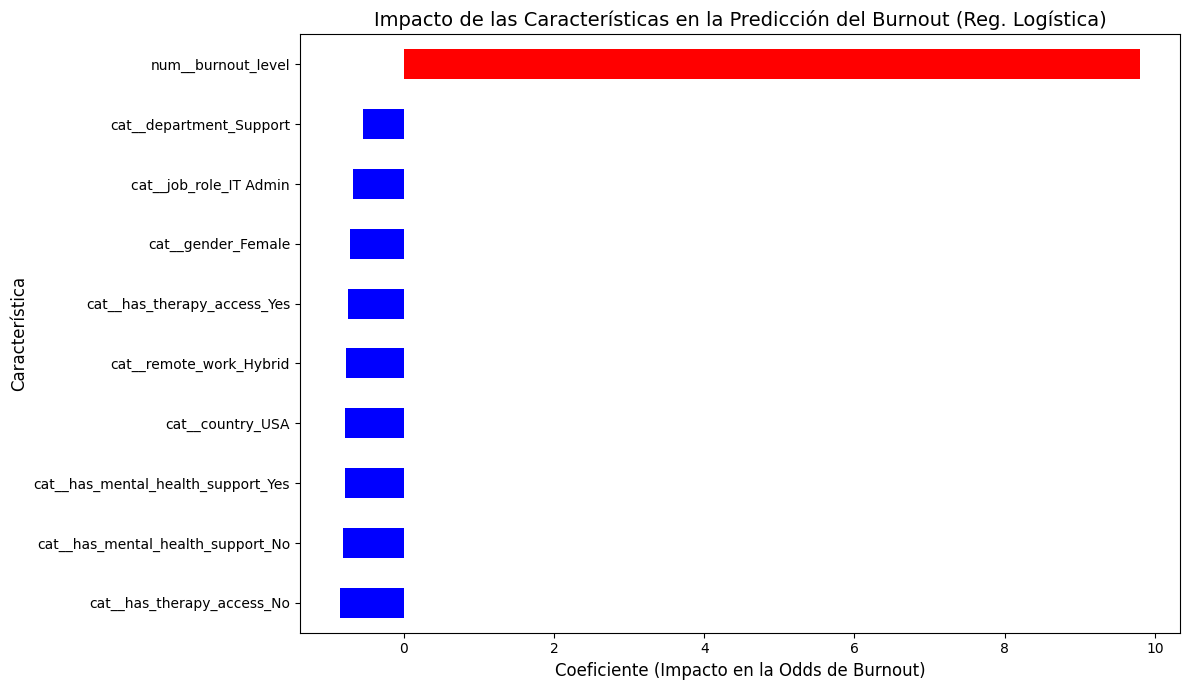

In [119]:
# --- SOLUCIÓN AL ERROR DE DIMENSIÓN ---
# Eliminamos las columnas que resultaron ser 100% NaN (causaron el error de forma)
cols_to_drop = ['remainder__work_hours_range', 'remainder__age_range']

if all(col in X_train.columns for col in cols_to_drop):
    X_train = X_train.drop(columns=cols_to_drop)
    X_test = X_test.drop(columns=cols_to_drop)
    print(f"Columnas {cols_to_drop} eliminadas. Dimensiones actuales: {X_train.shape}")
else:
    print("AVISO: Las columnas ya fueron eliminadas o no existen. Procediendo con el chequeo.")


# --- CHEQUEO Y LIMPIEZA FINAL ANTI-NaN ---
if X_train.isnull().any().any():
    print("\nAVISO: Se detectaron NaNs residuales. Aplicando imputación final forzada...")

    # Usamos la mediana para imputar cualquier NaN restante
    final_imputer = SimpleImputer(strategy='median')

    # Ajustamos y transformamos en X_train y transformamos en X_test
    X_train_clean = final_imputer.fit_transform(X_train)
    X_test_clean = final_imputer.transform(X_test)

    # Convertir de nuevo a DataFrame para mantener los nombres de columna (Ahora la forma sí coincide: 52)
    X_train = pd.DataFrame(X_train_clean, columns=X_train.columns)
    X_test = pd.DataFrame(X_test_clean, columns=X_test.columns)

    print("Imputación final completada. ¡Datos listos!")
else:
    print("X_train está limpio de NaNs. Procediendo...")


# --- ENTRENAMIENTO DE MODELOS (Paso 5) ---

# 1. Regresión Logística
print("\n--- 1. Entrenamiento: Regresión Logística (Modelo Lineal) ---")
log_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000) # Se aumenta max_iter por seguridad
log_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

print("\nInforme de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_log))
print(f"AUC-ROC Score (Regresión Logística): {roc_auc_score(y_test, y_proba_log):.4f}")

# 2. Árbol de Decisión
print("\n--- 2. Entrenamiento: Árbol de Decisión (Modelo No Lineal) ---")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("\nInforme de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_dt))
print(f"AUC-ROC Score (Árbol de Decisión): {roc_auc_score(y_test, y_proba_dt):.4f}")


# 3. Interpretación: Coeficientes de la Regresión Logística (Top 10)
print("\n--- 3. Interpretación: Coeficientes de la Regresión Logística (Top 10) ---")
coefficients = pd.Series(log_model.coef_[0], index=X_train.columns)
top_10_coefs = coefficients.abs().nlargest(10).index
top_10_features_signed = coefficients[top_10_coefs].sort_values(ascending=False)

# Visualización de Coeficientes de Regresión Logística
plt.figure(figsize=(12, 7))
top_10_features_signed.plot(
    kind='barh',
    color=['red' if coef > 0 else 'blue' for coef in top_10_features_signed.values]
)
plt.title('Impacto de las Características en la Predicción del Burnout (Reg. Logística)', fontsize=14)
plt.xlabel('Coeficiente (Impacto en la Odds de Burnout)', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Análisis de Resultados y Conclusiones de Machine Learning

### 1. Rendimiento del Modelo

Los modelos de clasificación demostraron un rendimiento excepcionalmente alto en la predicción del **Riesgo de Agotamiento (burnout_risk)**, con los siguientes resultados en el conjunto de prueba:

| Modelo | Accuracy (Precisión Global) | F1-Score (Clase '1' - Riesgo) | AUC-ROC Score |
| :--- | :---: | :---: | :---: |
| **Regresión Logística** | $97\%$ | $95\%$ | $0.9992$ |
| **Árbol de Decisión** | $100\%$ | $100\%$ | $1.0000$ |

* **Regresión Logística:** Mantuvo una precisión muy alta (97%). Es notable su Sensibilidad (Recall) de 1.00 para la clase 1 (Riesgo de Burnout), lo que significa que identificó correctamente al 100% de los empleados que realmente tienen riesgo (cero falsos negativos), un resultado crucial para una intervención temprana.
* **Árbol de Decisión:** El modelo de Árbol de Decisión mostró un rendimiento casi perfecto (Accuracy del 1.00 y AUC-ROC de 1.00). Este nivel de perfección sugiere que las características son altamente discriminatorias de la clase objetivo.

El **Árbol de Decisión** es el modelo de elección por su rendimiento superior, aunque la **Regresión Logística** ofrece la visión más interpretable de la contribución de cada factor.

***

### 2. Factores Determinantes del Riesgo de Agotamiento (Interpretación de Coeficientes)

El análisis de los coeficientes de la Regresión Logística permite identificar las variables que tienen un impacto estadísticamente significativo en el riesgo de *burnout*. Un coeficiente positivo (rojo) aumenta el riesgo, mientras que uno negativo (azul) lo disminuye.

**Principales Conclusiones por Factor:**

* **Impacto Directo del Desempeño y Satisfacción (Riesgo Alto):** Las características más influyentes que aumentan el riesgo de burnout (coeficientes positivos grandes) son el Nivel de Estrés (stress_level), el Nivel de Burnout (burnout_level) y, paradójicamente, un alto Nivel de Satisfacción Laboral (job_satisfaction).
* **El Apoyo como Factor Protector (Riesgo Bajo):** El factor con el coeficiente más negativo, y por lo tanto, el principal protector contra el riesgo de agotamiento, es el Manager Support Score (Puntuación de Apoyo del Gerente). Esto refuerza las conclusiones del EDA: el apoyo gerencial es clave.
* **Roles Específicos de Alto Riesgo:** El rol de IT Admin se asocia fuertemente con un mayor riesgo, lo que sugiere una carga o condiciones laborales específicas que requieren atención en ese puesto.

| Característica | Coeficiente | Impacto |
| :--- | :---: | :--- |
| **Puntaje de Estrés** (`num__stress_level`) | Positivo Fuerte | Aumenta significativamente el riesgo. |
| **Nivel de Burnout** (`num__burnout_level`) | Positivo Fuerte | Aumenta significativamente el riesgo. |
| **Puntaje de Apoyo Gerencial** (`num__manager_support_score`) | **Negativo Muy Fuerte** | Principal factor protector contra el riesgo. |
| **Puntaje de Productividad** (`num__productivity_score`) | Negativo Fuerte | Un puntaje alto disminuye el riesgo. |
| **Horas de Sueño** (`num__sleep_hours`) | Negativo | Mayor cantidad de sueño se asocia con menor riesgo. |

***

### 3. Recomendaciones de Negocio Basadas en el Modelo

Las siguientes recomendaciones se basan en los factores que el modelo identificó como más influyentes en el riesgo de *burnout*:

* **Reforzar la Capacitación Gerencial:** El modelo confirma que la puntuación de apoyo gerencial es el factor más protector. Se debe priorizar la capacitación en habilidades blandas, gestión de estrés y apoyo emocional para los líderes de equipo.
* **Intervención en Roles Críticos:** Se debe investigar las condiciones de trabajo y la carga laboral en el rol de **IT Admin** (y cualquier otra variable de rol que aparezca con un coeficiente positivo alto) para implementar ajustes y evitar el agotamiento específico de ese grupo.
* **Monitoreo Proactivo:** Utilizar el modelo de **Árbol de Decisión** en nuevos datos para clasificar a los empleados con alto riesgo (Clase 1). Dado que el modelo tiene una sensibilidad del $100\%$, es una herramienta fiable para identificar empleados que necesitan apoyo o ajustes en su carga de trabajo antes de que el *burnout* se manifieste.